In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [27]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
columns = [col for col in df.columns]
nan_columns = [col for col in df.columns if df[col].isnull().any()] #columns with NaN values
print(nan_columns)




['Sleep Disorder']


In [7]:
current_distribution = df['Sleep Disorder'].value_counts()
print(current_distribution)

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [8]:
non_null_data = df['Sleep Disorder'].dropna() #dropping rows with NaN values
nan_count = df['Sleep Disorder'].isnull().sum() #counting NaN values
print(f'Number of NaN values in "Sleep Disorder" column: {nan_count}')
print(non_null_data.value_counts())

Number of NaN values in "Sleep Disorder" column: 219
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [9]:
#Due to severe lack of data in Sleep Disorder column, we will use random sampling based on current distribution to fill NaN values
#This will help maintain the overall distribution of the data
unique_disorders = current_distribution.index.values
probabilities = current_distribution.values / current_distribution.values.sum()
nan_indices = df[df['Sleep Disorder'].isnull()].index
fill_values = np.random.choice(unique_disorders, size=len(nan_indices), p=probabilities)
df.loc[nan_indices, 'Sleep Disorder'] = fill_values


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df.isnull().sum() / df.shape[0] * 100

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


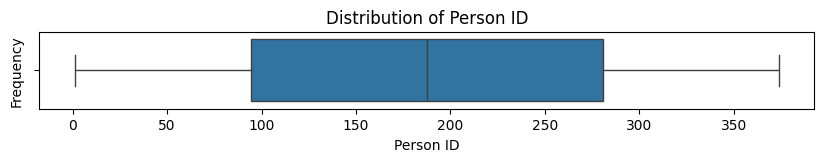

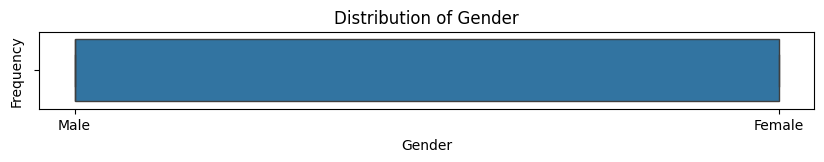

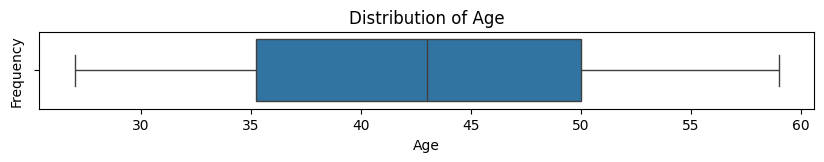

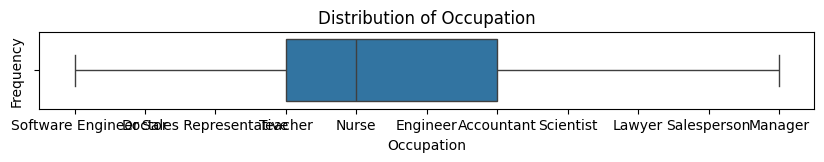

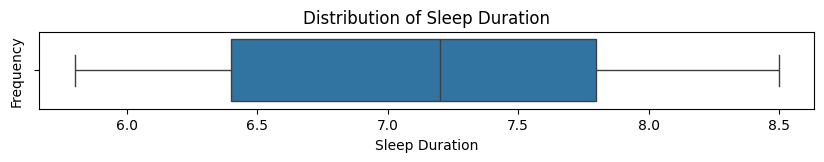

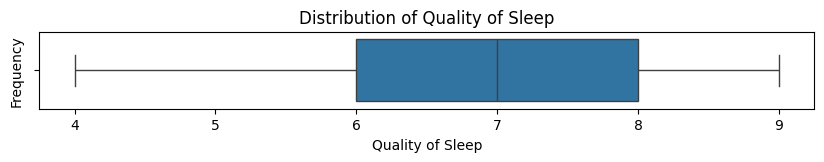

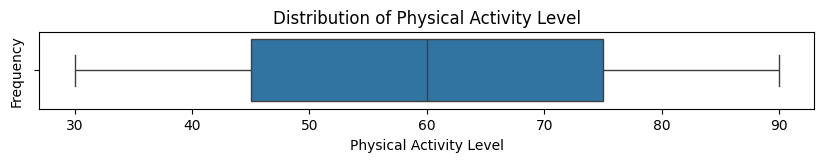

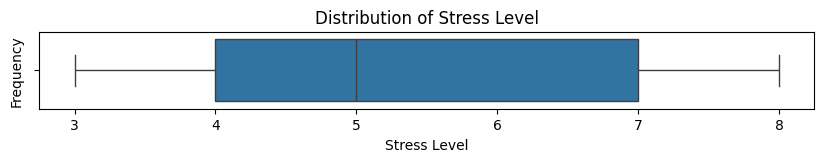

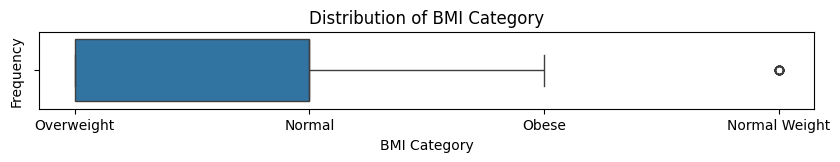

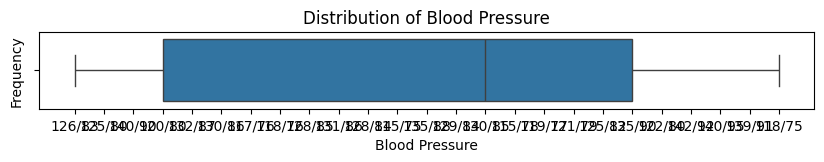

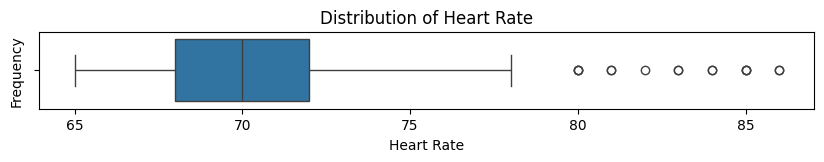

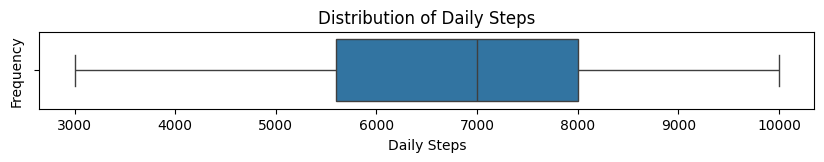

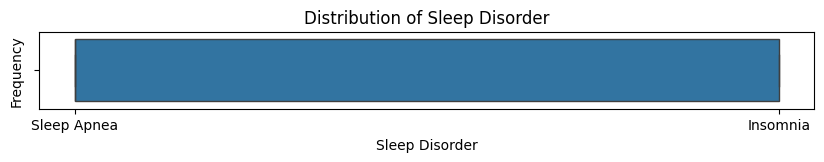

In [19]:
for colunm in df.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df, x=colunm)
    plt.title(f'Distribution of {colunm}')  
    plt.xlabel(colunm)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns 
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')
Numerical Columns: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')


In [25]:
df[cat_cols].nunique()


Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [26]:
df[num_cols].nunique()

Person ID                  374
Age                         31
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
Heart Rate                  19
Daily Steps                 20
dtype: int64

In [34]:
df_processed = df.drop(columns=['Person ID']) #Dropping Person ID as it is not useful for analysis
df_processed['Gender'] = df_processed['Gender'].map({'Male': 1, 'Female': 0}) #Binary encoded the Gender column
df_processed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_cols = df_processed.select_dtypes(include=['object']).columns
numeric_cols = df_processed.select_dtypes(include=['number']).columns.drop(['Gender'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_processed = pipeline.fit_transform(df_processed)

print("Transformed shape:", X_processed.shape)



Transformed shape: (374, 47)


In [37]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
'''Experimental approach using IterativeImputer from sklearn to fill missing values based on other features(using LLM answer)'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

# Use other columns to predict sleep disorder
imputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=42)
df_imputed = imputer.fit_transform(df[['Age', 'Stress Level', 'BMI Category', 'Sleep Disorder']])

ValueError: could not convert string to float: 'Overweight'